# Error symmetry wave divisor function.

The divisor function can be written as a summation of waves (see link below previous questions Stacks Exchange). The error in the wave divisor function is mainly determined by it's neighbor divisors. The error is proportional to:

$$ \varepsilon (x) \propto \sum_{\mathbb{X}\vert (x-1)}^{} \cos(k \mathbb{X}) + \sum_{\mathbb{X}\vert (x+1)}^{} \cos(k \mathbb{X})$$

Here $\mathbb{X} \vert (x-1)$ means: $\mathbb{X}$ divides $(x-1)$. Basically the divisors are added from the neighbors of $x$:

$$\varepsilon (9) = \cos(k1)+\cos(k2)+\cos(k4)+\cos(k8)+\cos(k1)+\cos(k2)+\cos(k5)+\cos(k10)$$

The total error then is a (cosine)summation of errors like Brownian motion. Where k is a constant and determines the pulse width of each divisor wave, see link below for more information.

$$ k=-\frac{2 \log(L)}{\pi \Delta x^{2}}$$

We can simulate the error for a number $x$ by keeping $L=0.5$ and vary $\Delta x$ between: 0.15 and 0.2 in 10000 steps. For every $k$ the error can be calculated. See simulation below.

It is observed that for $x=odd$ the error $\varepsilon (x)$ tends to nonsymmetrical/skewed distribution. For $x=even$ the error $\varepsilon (x)$ tends to a symmetrical distribution.

Normally 1 is excluded as an divisor, but the symmetrical and skewed distribution are always present (with and without 1 as divisor).

# Question:

Why does the error for odd and even numbers $x$ tend to behave symmetric and asymmetric/skewed? 

# More information.

More information: [Wave Divisor Function][1], [Question Stacks Exchange][2]

[1]: https://mybinder.org/v2/gh/oooVincentooo/Shared/master?filepath=Wave%20Divisor%20Function%20rev%202.4.ipynb
[2]: https://math.stackexchange.com/q/3427431

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2

import numpy as np

from IPython.display import display
import ipywidgets as widgets

from operator import add
from operator import sub
from operator import mul
from operator import truediv

from IPython.display import display

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


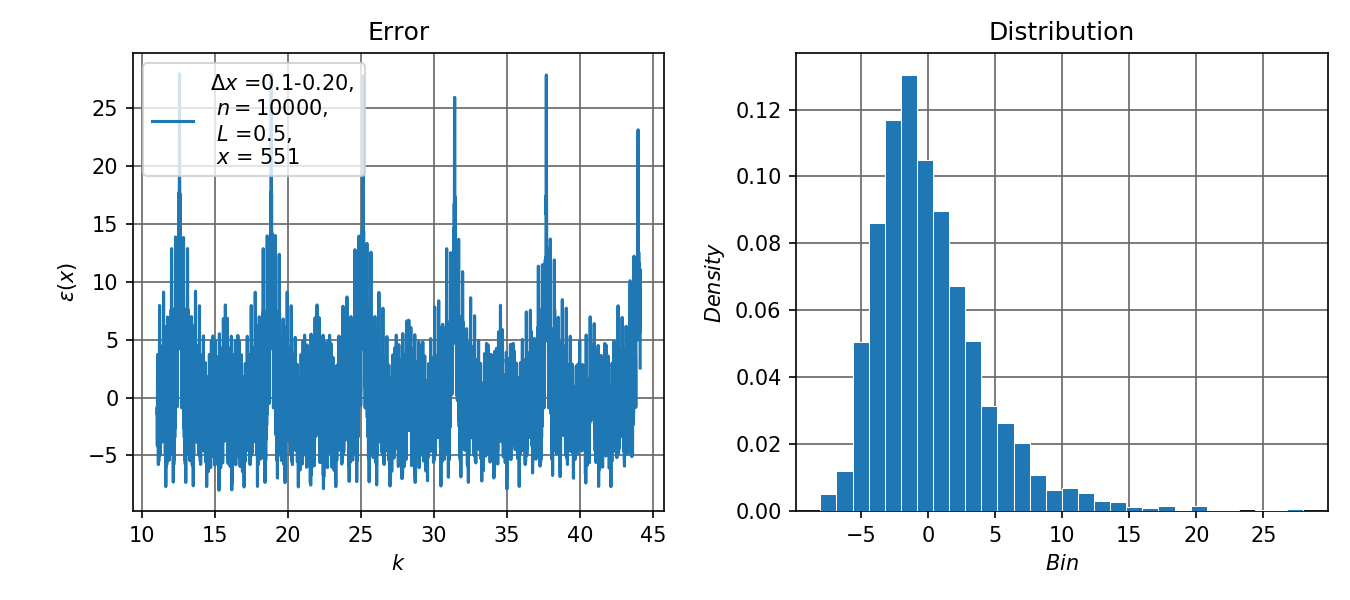

interactive(children=(Dropdown(description='$x$:', index=50, options=(500, 501, 502, 503, 504, 505, 506, 507, …

In [3]:
fig, ax1= plt1.subplots(1,2, figsize=(9, 4))

from ipywidgets import IntProgress

def update_plot(sx2):
    
    ax1[0].clear()
    ax1[1].clear()
    
    wave2=list(range(1,sx2+2))
    #print(wave)
    
    #dx range
    dxr2=np.linspace(0.1,0.2,10000)
    
    errt2=[0]*10000
    error2=[0]*10000
    #print(errt)

    #k range
    k=-2*np.log(0.5)/(np.pi*dxr2**2)
    #k=np.linspace(10,40,10000)

    f = IntProgress(min=0, max=sx2+2, description="")
    display(f)
    
    #Total neighbor divisors counter
    nd=0
    
    for x2 in wave2:
        
        # #N range
        # N1=(np.log(0.5))/(np.log(np.cos(np.pi*dxr/x)))
        # #print(N1)
        # N1=2*np.round(0.5*N1,0)     
        # #print(N1)
        f.value += 1
        

        if ((sx2-1)%x2)==0:
            error2=np.cos(k*x2)
            nd=nd+1
            #error=np.cos(np.pi*N1/x)
            #print(str((sx-1)) +': ' + str(x))

        else:
            error2=[0]*10000

        errt2=list(map(add, errt2, error2))
        
        if ((sx2+1)%x2)==0:
            error2=np.cos(k*x2)
            nd=nd+1
            #error=np.cos(np.pi*N1/x)
            #print(str((sx+1)) +': ' + str(x))
   
        else:
            error2=[0]*10000
        
        errt2=list(map(add, errt2, error2))
    
    print("Mean: " + str(np.mean(errt2)))
    print("Var: " + str(np.var(errt2)))
    print("Number of neighbor divisors of (x=" + str(sx2) + "): " + str(nd))
    
    
    
    #Plot Error
    units3 = '$\Delta x$ =0.1-0.20, \n $n=10000$, \n $L$ =0.5, \n $x$ = {}'
    ax1[0].plot(k, errt2, color='#1f77b4', label=units3.format(sx2))
    ax1[0].legend(loc=2)
    ax1[0].set_title('Error')
    ax1[0].set_xlabel('$k$')
    ax1[0].set_ylabel('$\epsilon(x)$')
    ax1[0].grid(b=True, which='major', color='#666666', linestyle='-')
 
    #Plot histogram error
    ax1[1].hist(errt2, density=True, bins=30, rwidth=1, edgecolor='white', linewidth=0.5, zorder=5)
    ax1[1].set_xlabel('$Bin$')
    ax1[1].set_ylabel('$Density$')
    ax1[1].set_title('Distribution')
    ax1[1].grid(b=True, which='major', color='#666666', linestyle='-', zorder=0)

    plt1.tight_layout()
    plt1.show()
    
    f.close()

sx2 = widgets.Dropdown(options=list(range(500,1001)), description='$x$:',value=550)   

widgets.interactive(update_plot, sx2=sx2)

# Partial Answer Skew Error Distribution.

This is the divisor counting of neighbors left and right of x. So sum of divisors at (x-1) and (x+1). 

**Assumption 1:**

Divisors of odd numbers will always be odd:
[Do odd numbers have only odd divisors?][1]

**Case 1 (odd divisors only):**

Function analysis show that the following function is symmetrical (positive and negative spikes occur).
$$ \varepsilon(k) = \sum_{\mathbb{X}=2}^{30} \cos(k (2\mathbb{X}-1))$$


**Case 2 (even divisors only):**

Function analysis show that the following function only has positive spikes.
$$ \varepsilon(k) = \sum_{\mathbb{X}=2}^{30} \cos(k 2 \mathbb{X})$$

So for even divisors the distribution will look skewed asymmetrical. Even divisors have a mix of odd and even divisors.

Thus the error in the wave divisor function $\sigma_{0}(x)$: for even numbers $x$ is symmetric and the error for odd numbers $x$ is skewed.

Though no proof is supplied for both formula above. Maybe the derivative (and determine max and min) supply the proof. 

[1]: https://math.stackexchange.com/q/1436656/650339


<IPython.core.display.Javascript object>


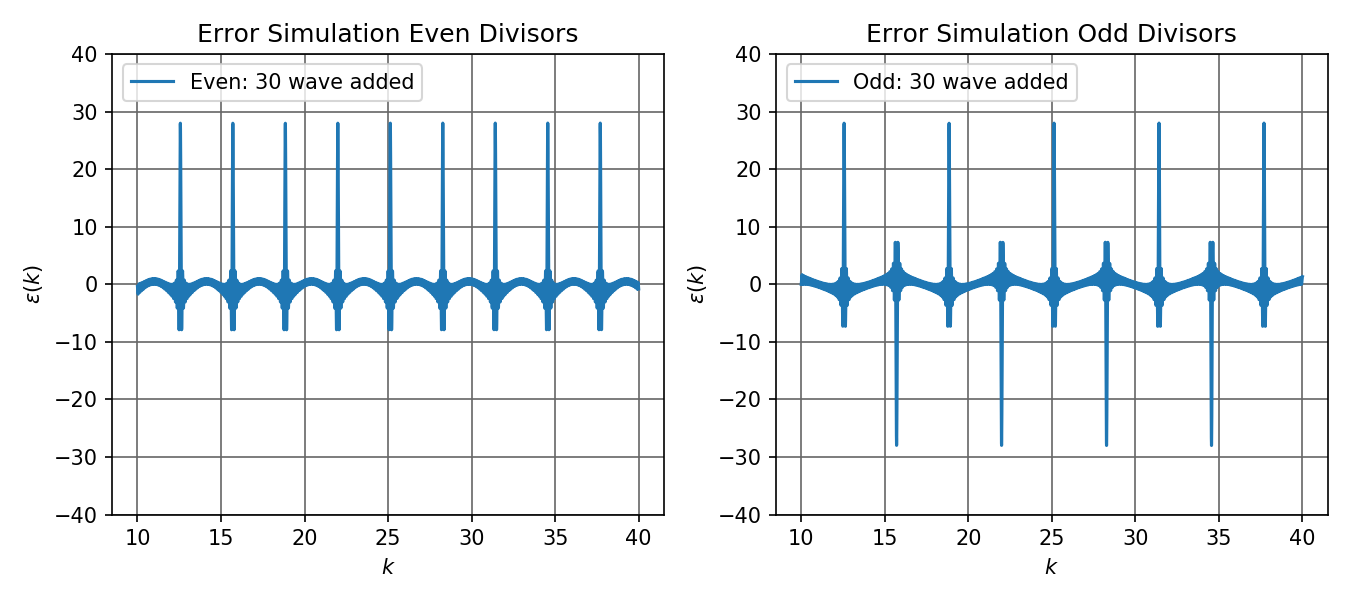

In [4]:
fig, ax2= plt2.subplots(1,2, figsize=(9, 4))

from ipywidgets import IntProgress

wave2=list(range(2,30))
#print(wave)

#k range
k=np.linspace(10,40,10000)

yevent=[0]*10000
yoddt=[0]*10000

for x2 in wave2:

    #Even cos(kX)
    yeven=np.cos(k*(2*x2))
    yevent=list(map(add, yevent, yeven))

    #Odd cos(kX)
    yodd=np.cos(k*(2*x2-1))
    yoddt=list(map(add, yoddt, yodd))

#Plot Error
units4 = 'Even: 30 wave added'
ax2[0].plot(k, yevent, color='#1f77b4', label=units4)
ax2[0].legend(loc=2)
ax2[0].set_title('Error Simulation Even Divisors')
ax2[0].set_xlabel('$k$')
ax2[0].set_ylabel('$\epsilon(k)$')
ax2[0].grid(b=True, which='major', color='#666666', linestyle='-')
ax2[0].set(ylim=(-40, 40))

#Plot Error
units5 = 'Odd: 30 wave added'
ax2[1].plot(k, yoddt, color='#1f77b4', label=units5)
ax2[1].legend(loc=2)
ax2[1].set_title('Error Simulation Odd Divisors')
ax2[1].set_xlabel('$k$')
ax2[1].set_ylabel('$\epsilon(k)$')
ax2[1].grid(b=True, which='major', color='#666666', linestyle='-')    
ax2[1].set(ylim=(-40, 40))

plt2.tight_layout()
plt2.show()